In [65]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [66]:
%cd /content/drive/My Drive/codingan /Dataset

/content/drive/My Drive/codingan /Dataset


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [68]:
eeg_data = pd.read_csv("EEG_data 1.csv")
eeg_data_info = pd.read_csv ("demographic_info.csv")

In [69]:
eeg_data.shape

(12811, 15)

In [70]:
eeg_data.head()

SubjectID  VideoID  Attention  Mediation    Raw      Delta     Theta  \
0        0.0      0.0       56.0       43.0  278.0   302000.0   90600.0   
1        0.0      0.0       40.0       35.0  -50.0    73800.0   28100.0   
2        0.0      0.0       47.0       48.0  101.0   758000.0  384000.0   
3        0.0      0.0       47.0       57.0   -5.0  2010000.0  129000.0   
4        0.0      0.0       44.0       53.0   -8.0  1010000.0  354000.0   

     Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  predefinedlabel  \
0   33700.0  24000.0  27900.0   45100.0  33200.0   8290.0              0.0   
1    1440.0   2240.0   2750.0    3690.0   5290.0   2740.0              0.0   
2  202000.0  62100.0  36300.0  131000.0  57200.0  25400.0              0.0   
3   61200.0  17100.0  11500.0   62500.0  50000.0  33900.0              0.0   
4   37100.0  88900.0  45300.0   99600.0  44800.0  29700.0              0.0   

   user-definedlabeln  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [71]:
#  Rename column subjectID
eeg_data_info.rename(columns={'subject ID':'SubjectID'}, inplace=True)

In [72]:
eeg_data['Sample'] = eeg_data.reset_index().index +0.5

In [73]:
eeg_data_info

SubjectID   age    ethnicity  gender
0          0    25  Han Chinese       M
1          1    24  Han Chinese       M
2          2    31      English       M
3          3    28  Han Chinese       F
4          4    24      Bengali       M
5          5    24  Han Chinese       M
6          6    24  Han Chinese       M
7          7    25  Han Chinese       M
8          8    25  Han Chinese       M
9          9    24  Han Chinese       F

In [74]:
eeg_data_info = eeg_data_info.merge(eeg_data, on='SubjectID')

In [75]:
eeg_data_info.head()

SubjectID   age    ethnicity  gender  VideoID  Attention  Mediation    Raw  \
0          0    25  Han Chinese       M      0.0       56.0       43.0  278.0   
1          0    25  Han Chinese       M      0.0       40.0       35.0  -50.0   
2          0    25  Han Chinese       M      0.0       47.0       48.0  101.0   
3          0    25  Han Chinese       M      0.0       47.0       57.0   -5.0   
4          0    25  Han Chinese       M      0.0       44.0       53.0   -8.0   

       Delta     Theta    Alpha1   Alpha2    Beta1     Beta2   Gamma1  \
0   302000.0   90600.0   33700.0  24000.0  27900.0   45100.0  33200.0   
1    73800.0   28100.0    1440.0   2240.0   2750.0    3690.0   5290.0   
2   758000.0  384000.0  202000.0  62100.0  36300.0  131000.0  57200.0   
3  2010000.0  129000.0   61200.0  17100.0  11500.0   62500.0  50000.0   
4  1010000.0  354000.0   37100.0  88900.0  45300.0   99600.0  44800.0   

    Gamma2  predefinedlabel  user-definedlabeln  Sample  
0   8290.0              0.0                 0.0     0.5  
1   2740.0              0.0                 0.0     1.5  
2  25400.0              0.0                 0.0     2.5  
3  33900.0              0.0                 0.0     3.5  
4  29700.0              0.0                 0.0     4.5

In [76]:
eeg_data_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12811 entries, 0 to 12810
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  int64  
 1    age                12811 non-null  int64  
 2    ethnicity          12811 non-null  object 
 3    gender             12811 non-null  object 
 4   VideoID             12811 non-null  float64
 5   Attention           12811 non-null  float64
 6   Mediation           12811 non-null  float64
 7   Raw                 12811 non-null  float64
 8   Delta               12811 non-null  float64
 9   Theta               12811 non-null  float64
 10  Alpha1              12811 non-null  float64
 11  Alpha2              12811 non-null  float64
 12  Beta1               12811 non-null  float64
 13  Beta2               12811 non-null  float64
 14  Gamma1              12811 non-null  float64
 15  Gamma2              12811 non-null  float64
 16  pred

In [77]:
eeg_data_info.rename(columns={' gender':'Gender'}, inplace=True)
eeg_data_info.rename(columns={' age':'Age'}, inplace=True)
eeg_data_info.rename(columns={' ethnicity':'Ethnicity'}, inplace=True)

In [78]:
#  change categorical data to numerical data
eeg_data_info['Gender'] = eeg_data_info['Gender'].replace({'M':1, 'F':0})
eeg_data_info['Ethnicity']=eeg_data_info['Ethnicity'].replace({'Han Chinese':0,'Bengali':1,'English':2})

# EXPLORATORY DATA ANALYSIS


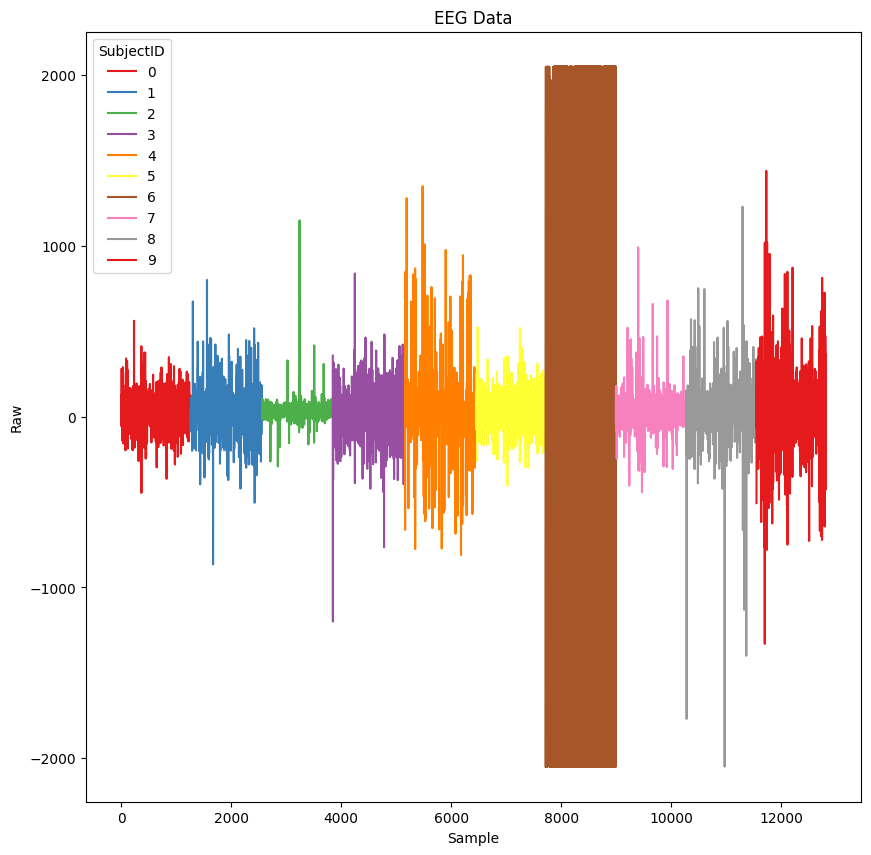

In [79]:
import seaborn as sns  # Import the seaborn library

plt.figure(figsize=(10, 10))  # Set the size of the plot

sns.lineplot(data=eeg_data_info, x='Sample', y='Raw', hue='SubjectID', palette='Set1')

plt.xlabel('Sample')  # Set the x-axis label
plt.ylabel('Raw')  # Set the y-axis label
plt.title('EEG Data')  # Set the plot title

plt.show()  # Display the plot

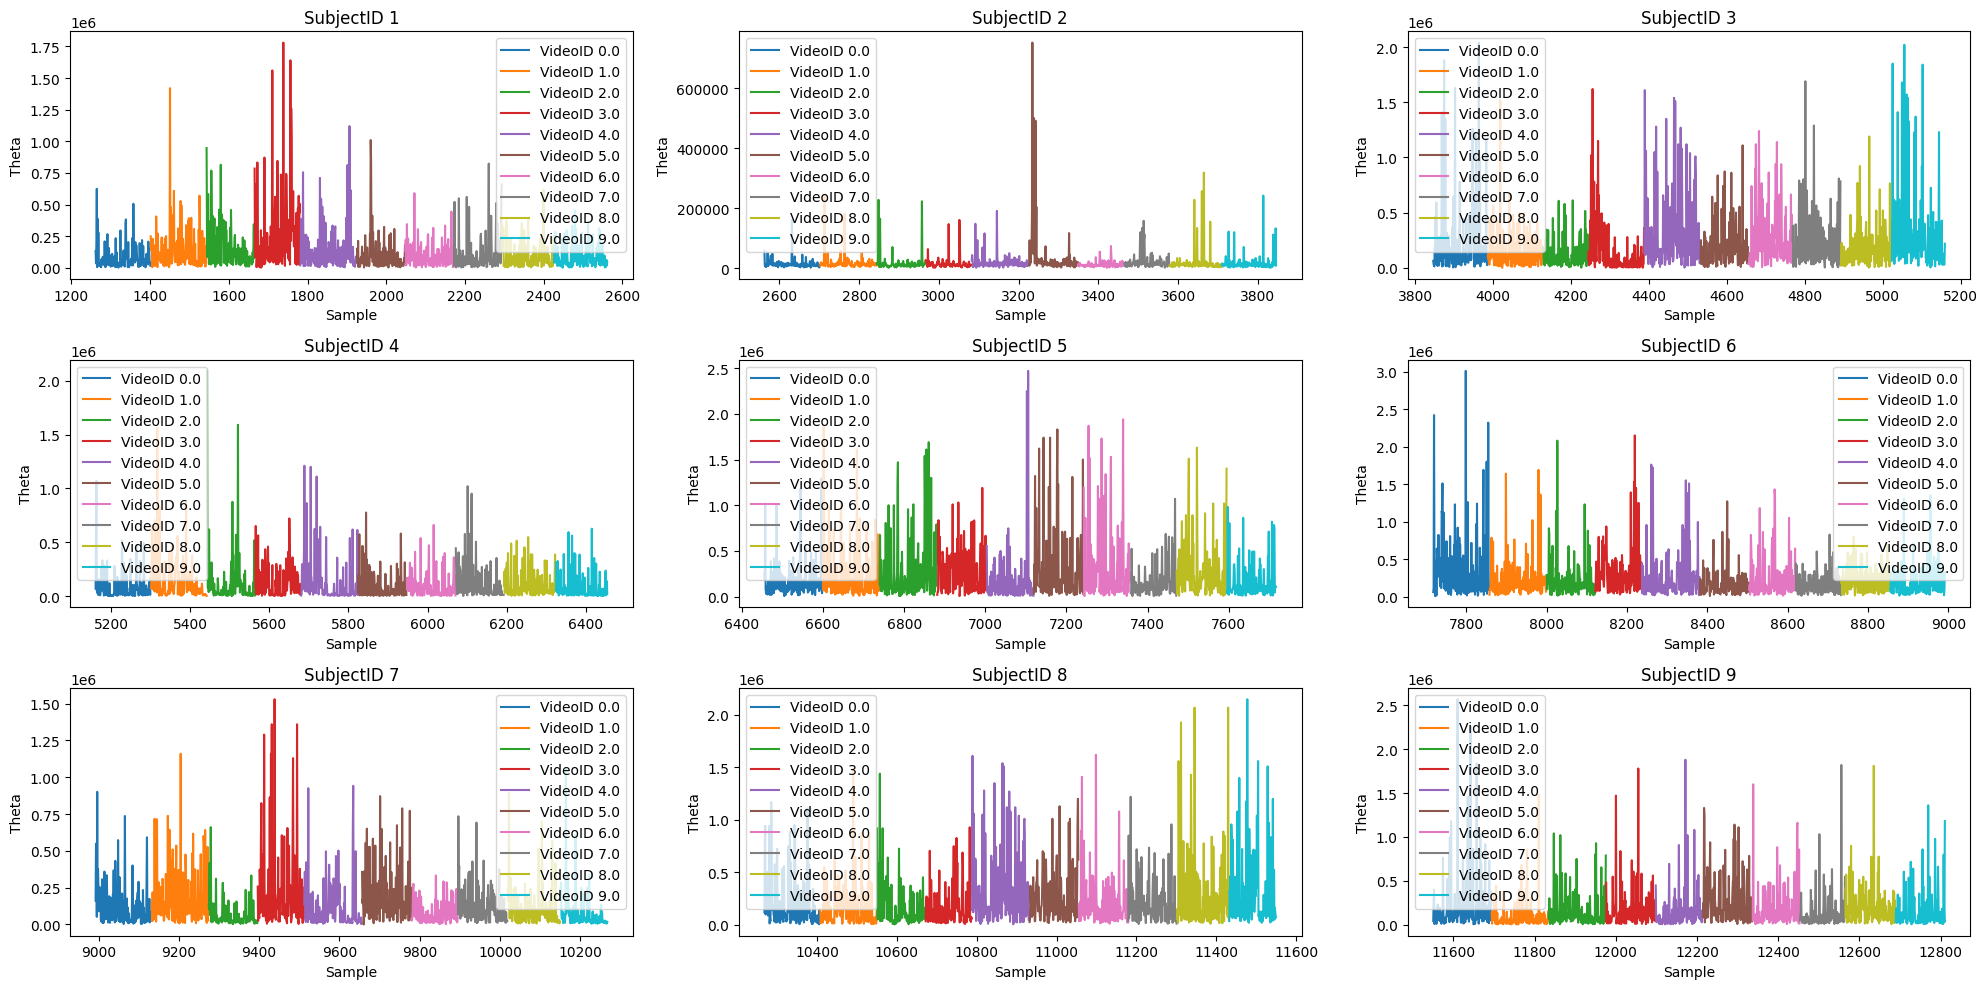

In [80]:
# Filter the DataFrame for subjects 1-9
filtered_df = eeg_data_info[eeg_data_info['SubjectID'].between(0, 9)]

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

# Iterate over subjects and plot each VideoID subplot
for i, ax in enumerate(axes.flatten()):
    subject_data = filtered_df[filtered_df['SubjectID'] == i+1]
    for video_id, group_data in subject_data.groupby('VideoID'):
        ax.plot(group_data['Sample'], group_data['Theta'], label=f'VideoID {video_id}')
    ax.set_xlabel('Sample')
    ax.set_ylabel('Theta')
    ax.set_title(f'SubjectID {i+1}')
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

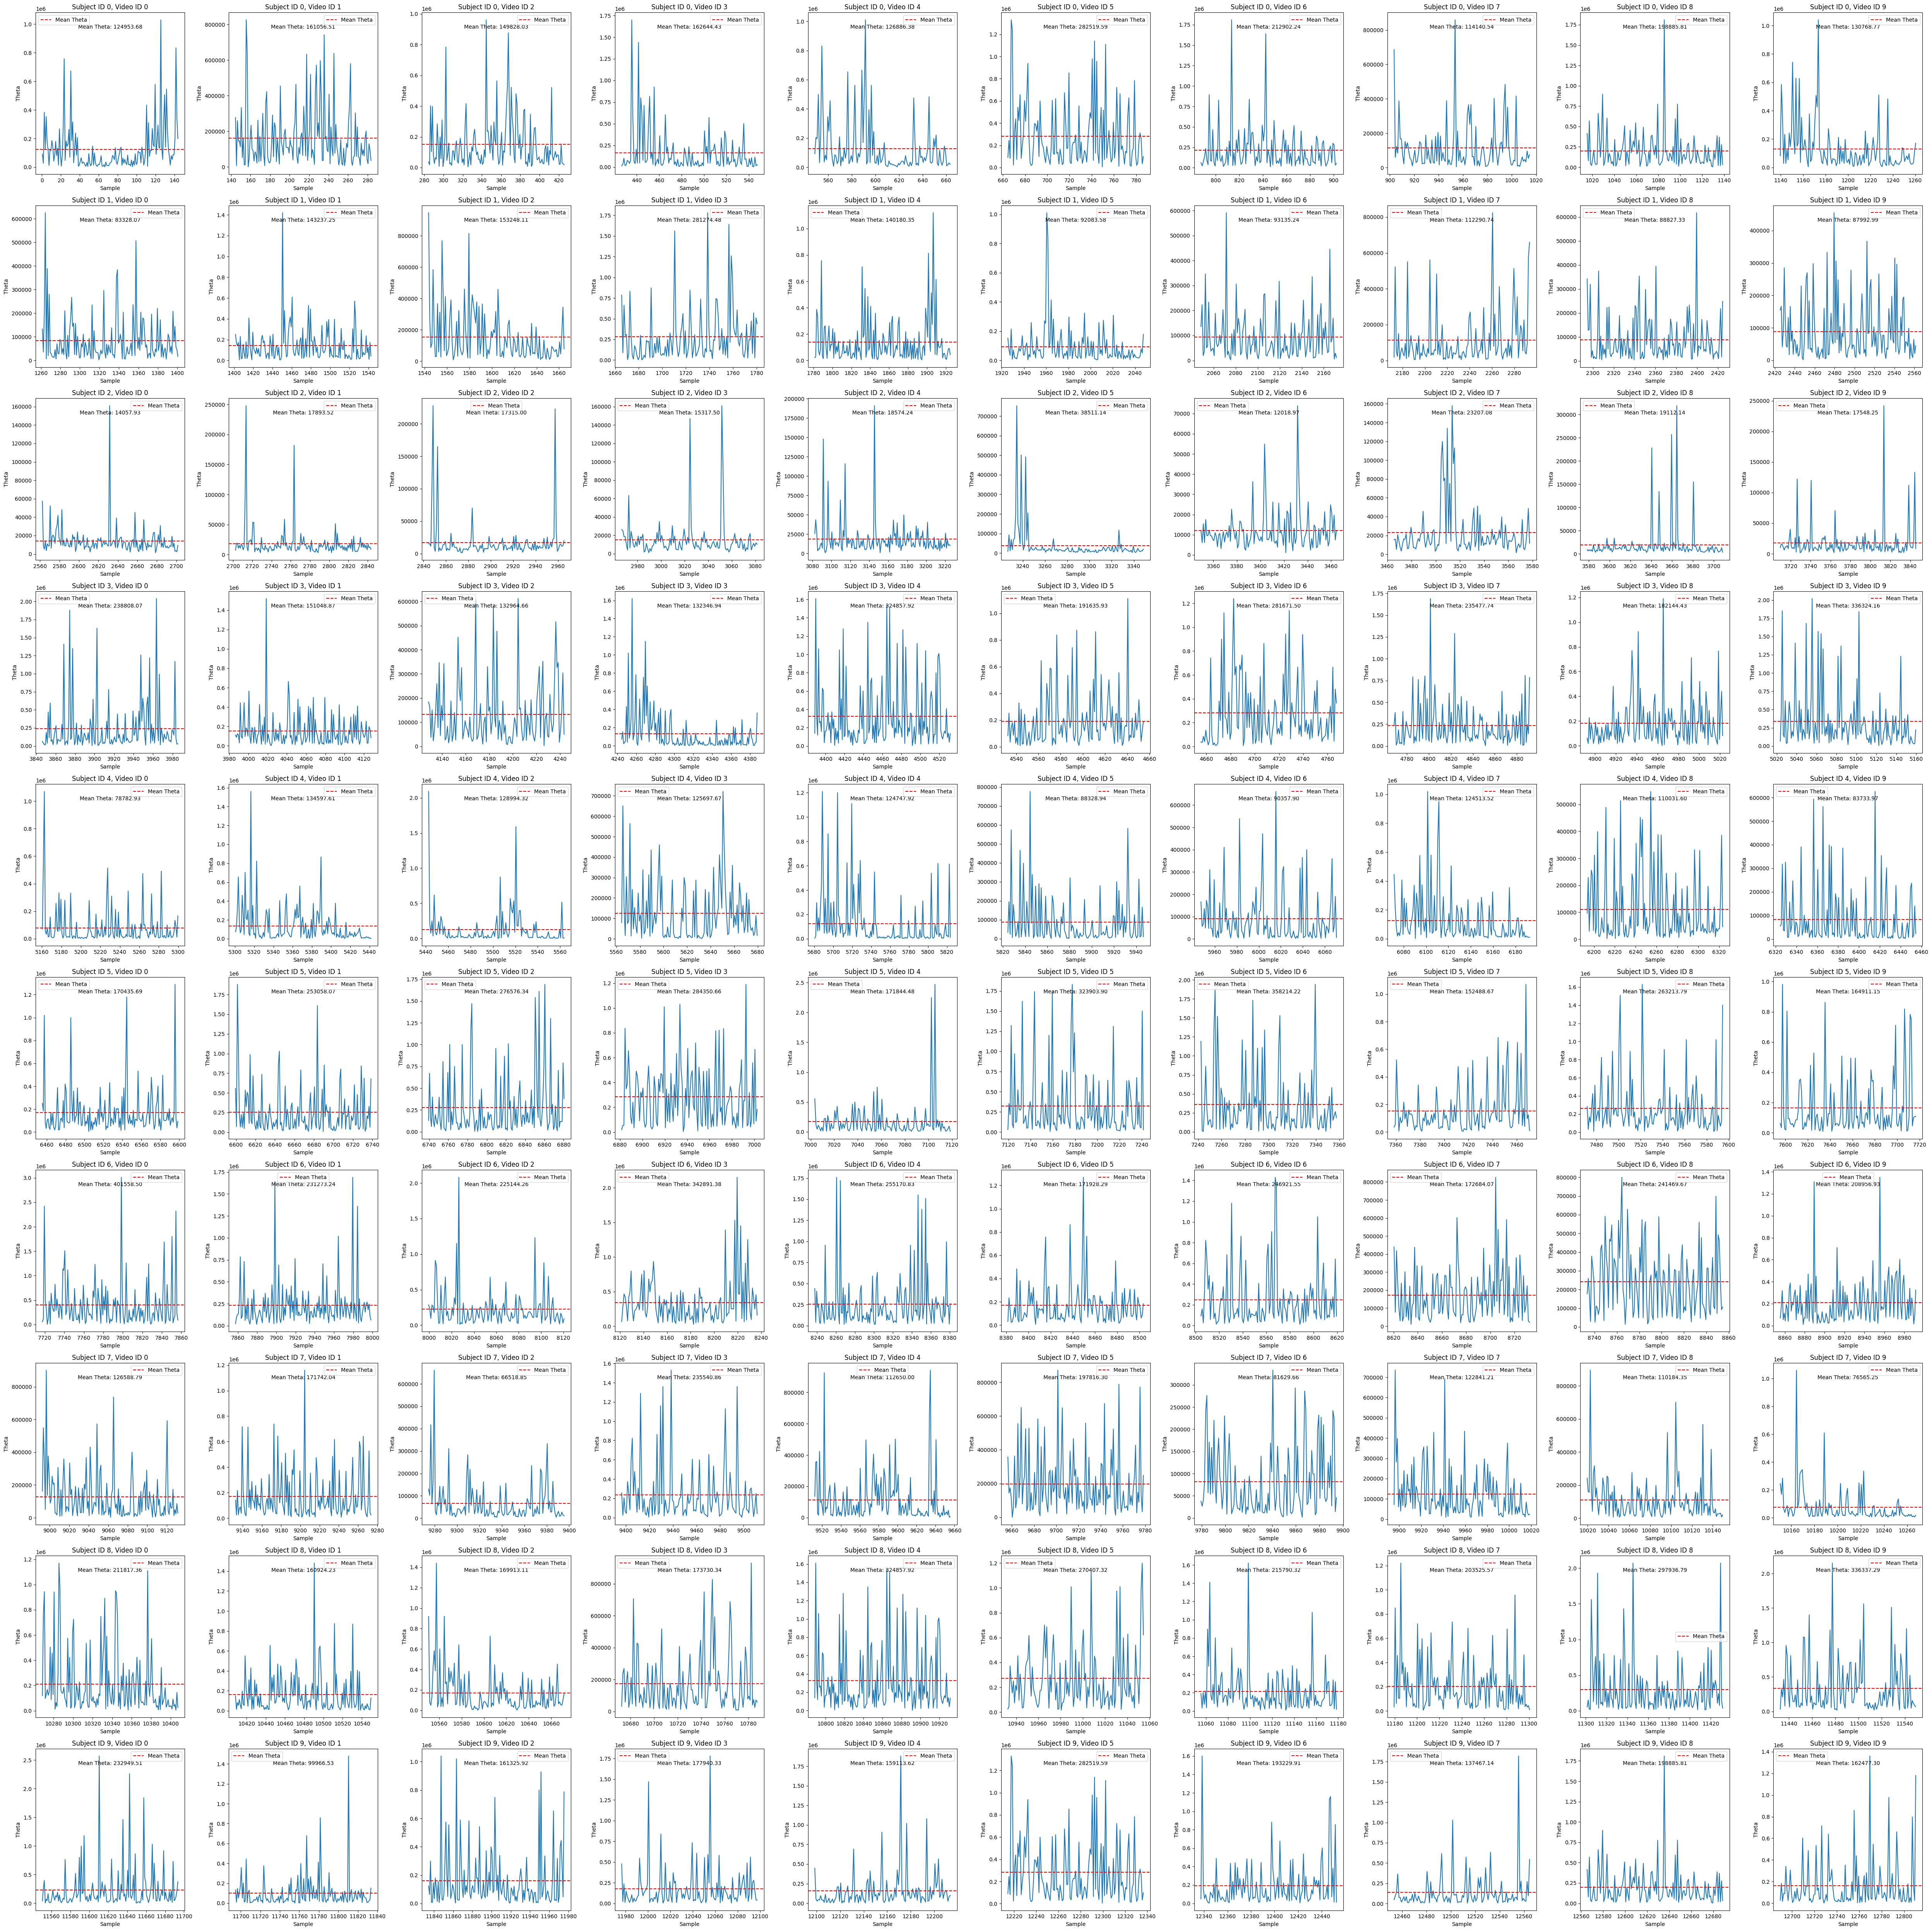

In [81]:
# Set the figure size and create subplots
fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(50, 50))

# Iterate through subject IDs and video IDs to plot each subplot
for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        subject_id = i + 0  # Calculate subject ID based on subplot row
        video_id = j + 0  # Calculate video ID based on subplot column
        subset_df = eeg_data_info[(eeg_data_info['SubjectID'] == subject_id) & (eeg_data_info['VideoID'] == video_id)]
        sns.lineplot(data=subset_df, x='Sample', y='Theta', ax=ax)
        ax.set_title(f'Subject ID {subject_id}, Video ID {video_id}')
        ax.set_xlabel('Sample')
        ax.set_ylabel('Theta')  # Removed extra indentation here
        # Calculate and display the mean of Theta on the plot
        mean_theta = subset_df['Theta'].mean()
        ax.axhline(mean_theta, color='red', linestyle='--', label='Mean Theta')
        ax.legend()
        ax.text(0.5, 0.9, f'Mean Theta: {mean_theta:.2f}', transform=ax.transAxes, ha='center')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

# MOST CONFUSED STUDENT AND CAN BE SYNONYMOUS TO THE LESS INTELLIGENT OF THE STUDENTS

In [82]:
# Iterate through subject IDs and calculate the mean Theta for each subject
mean_theta_list = []
for subject_id in eeg_data_info['SubjectID'].unique():
    subset_df = eeg_data_info[eeg_data_info['SubjectID'] == subject_id]
    mean_theta = subset_df['Theta'].mean()
    mean_theta_list.append((subject_id, mean_theta))

# Sort the mean_theta_list in descending order based on the mean Theta values
mean_theta_list.sort(key=lambda x: x[1], reverse=True)

# Print the list of mean Theta values for each subject in descending order
for subject_id, mean_theta in mean_theta_list:
    print(f"Subject ID {subject_id}: Mean Theta = {mean_theta:.2f}")

Subject ID 6: Mean Theta = 251322.64
Subject ID 5: Mean Theta = 241879.06
Subject ID 8: Mean Theta = 236921.27
Subject ID 3: Mean Theta = 221217.76
Subject ID 9: Mean Theta = 180538.62
Subject ID 0: Mean Theta = 165919.27
Subject ID 7: Mean Theta = 130306.46
Subject ID 1: Mean Theta = 125889.04
Subject ID 4: Mean Theta = 108932.19
Subject ID 2: Mean Theta = 19263.40


In [83]:
# Create an empty list to store mean values
mean_values = []

# Iterate through subject IDs and video IDs
for subject_id in range(10):
    for video_id in range(10):
        subset_df = eeg_data_info[(eeg_data_info['SubjectID'] == subject_id) & (eeg_data_info['VideoID'] == video_id)]
        mean_theta1 = subset_df['Theta'].mean()
        mean_values.append((subject_id, video_id, mean_theta1))

# Create a dictionary to map subject ID and video ID to mean theta values
mean_theta1_dict = {(subject_id, video_id): mean_theta1 for subject_id, video_id, mean_theta1 in mean_values}


# Add the mean values as a new column in the original DataFrame
eeg_data_info['MeanTheta'] = [mean_theta1_dict.get((subject_id, video_id), None) for subject_id, video_id in zip(eeg_data_info['SubjectID'], eeg_data_info['VideoID'])]

# Print the updated DataFrame with the new MeanTheta column
eeg_data_info.head()

SubjectID  Age  Ethnicity  Gender  VideoID  Attention  Mediation    Raw  \
0          0   25          0       1      0.0       56.0       43.0  278.0   
1          0   25          0       1      0.0       40.0       35.0  -50.0   
2          0   25          0       1      0.0       47.0       48.0  101.0   
3          0   25          0       1      0.0       47.0       57.0   -5.0   
4          0   25          0       1      0.0       44.0       53.0   -8.0   

       Delta     Theta    Alpha1   Alpha2    Beta1     Beta2   Gamma1  \
0   302000.0   90600.0   33700.0  24000.0  27900.0   45100.0  33200.0   
1    73800.0   28100.0    1440.0   2240.0   2750.0    3690.0   5290.0   
2   758000.0  384000.0  202000.0  62100.0  36300.0  131000.0  57200.0   
3  2010000.0  129000.0   61200.0  17100.0  11500.0   62500.0  50000.0   
4  1010000.0  354000.0   37100.0  88900.0  45300.0   99600.0  44800.0   

    Gamma2  predefinedlabel  user-definedlabeln  Sample      MeanTheta  
0   8290.0              0.0                 0.0     0.5  124953.680556  
1   2740.0              0.0                 0.0     1.5  124953.680556  
2  25400.0              0.0                 0.0     2.5  124953.680556  
3  33900.0              0.0                 0.0     3.5  124953.680556  
4  29700.0              0.0                 0.0     4.5  124953.680556

In [84]:
min_value = eeg_data_info['MeanTheta'].min()
max_value = eeg_data_info['MeanTheta'].max()
eeg_data_info['ConfusionScore'] = (eeg_data_info['MeanTheta'] - min_value) / (max_value - min_value)

# ESTIMATE CONFUSION SCORE TO MAKE IT BINARY

In [85]:
eeg_data_info['Confusion_score'] = eeg_data_info['ConfusionScore'].round(0)

In [86]:
eeg_data_info.tail(300)

SubjectID  Age  Ethnicity  Gender  VideoID  Attention  Mediation  \
12511          9   24          0       0      7.0       16.0       41.0   
12512          9   24          0       0      7.0        4.0       43.0   
12513          9   24          0       0      7.0       11.0       54.0   
12514          9   24          0       0      7.0       16.0       37.0   
12515          9   24          0       0      7.0       24.0       43.0   
...          ...  ...        ...     ...      ...        ...        ...   
12806          9   24          0       0      9.0       64.0       38.0   
12807          9   24          0       0      9.0       61.0       35.0   
12808          9   24          0       0      9.0       60.0       29.0   
12809          9   24          0       0      9.0       60.0       29.0   
12810          9   24          0       0      9.0       64.0       29.0   

         Raw      Delta      Theta  ...    Beta1     Beta2   Gamma1   Gamma2  \
12511 -151.0   822000.0   199000.0  ...   7080.0    6410.0  15100.0   1770.0   
12512   85.0  2580000.0   571000.0  ...   9550.0   48100.0  48100.0  11800.0   
12513  149.0   122000.0     6220.0  ...   1030.0    3600.0   3200.0    385.0   
12514   74.0  1490000.0    74800.0  ...  15200.0   10600.0   2770.0   1600.0   
12515 -246.0  1700000.0   438000.0  ...  29200.0   41800.0  32800.0   3090.0   
...      ...        ...        ...  ...      ...       ...      ...      ...   
12806  -39.0   128000.0     9950.0  ...   3870.0   39700.0   2600.0    960.0   
12807 -275.0   323000.0   797000.0  ...  39800.0  571000.0  36600.0  10000.0   
12808 -426.0   681000.0   154000.0  ...  11000.0   27000.0  20400.0   2020.0   
12809  -84.0   366000.0    27300.0  ...   1940.0    3280.0  12300.0   1760.0   
12810  -49.0  1160000.0  1180000.0  ...  10600.0  445000.0  22100.0   4480.0   

       predefinedlabel  user-definedlabeln   Sample      MeanTheta  \
12511              1.0                 0.0  12511.5  137467.142857   
12512              1.0                 0.0  12512.5  137467.142857   
12513              1.0                 0.0  12513.5  137467.142857   
12514              1.0                 0.0  12514.5  137467.142857   
12515              1.0                 0.0  12515.5  137467.142857   
...                ...                 ...      ...            ...   
12806              1.0                 0.0  12806.5  162477.295082   
12807              1.0                 0.0  12807.5  162477.295082   
12808              1.0                 0.0  12808.5  162477.295082   
12809              1.0                 0.0  12809.5  162477.295082   
12810              1.0                 0.0  12810.5  162477.295082   

       ConfusionScore  Confusion_score  
12511        0.322042              0.0  
12512        0.322042              0.0  
12513        0.322042              0.0  
12514        0.322042              0.0  
12515        0.322042              0.0  
...               ...              ...  
12806        0.386247              0.0  
12807        0.386247              0.0  
12808        0.386247              0.0  
12809        0.386247              0.0  
12810        0.386247              0.0  

[300 rows x 22 columns]

In [87]:
print(eeg_data_info['Confusion_score'].min())
print(eeg_data_info['Confusion_score'].max())

0.0
1.0


In [88]:
eeg_data_info = eeg_data_info.drop('ConfusionScore', axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

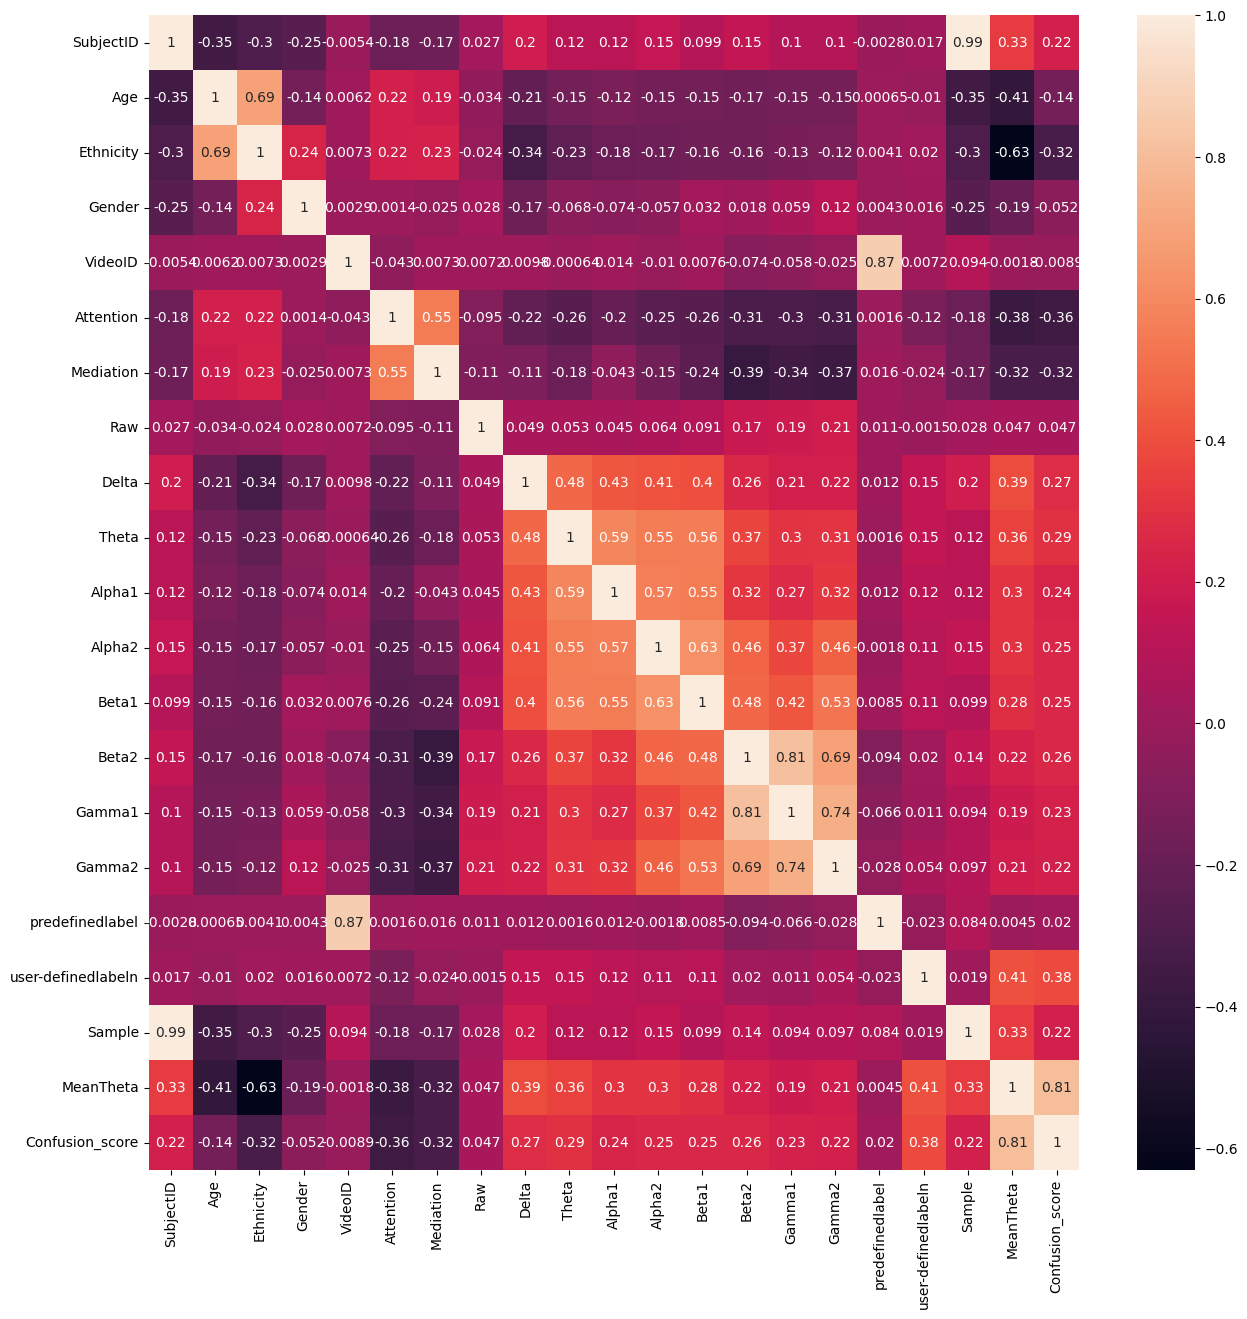

In [89]:
plt.figure(figsize = (15,15))
corr_matrix = eeg_data_info.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show

# MODELLING

In [90]:
from imblearn.over_sampling import SMOTE

In [91]:
columns_to_keep = ['MeanTheta','Gamma', 'Delta'	, 'Theta', 'Alpha1', 'Alpha2','Beta1',	'Beta2', 'Gamma1', 'Gamma2']
# Drop all columns except the specified ones
X = eeg_data_info.drop(eeg_data_info.columns.difference(columns_to_keep), axis=1)
y = eeg_data_info['Confusion_score']

In [92]:
print(X.shape)
print(y.shape)
class_counts = pd.value_counts(y)
print(class_counts)

(12811, 9)
(12811,)
0.0    8829
1.0    3982
Name: Confusion_score, dtype: int64


# LOGISTIC REGRESSION

In [93]:
# Split the data into training and testing sets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


# Split the data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(StandardScaler().fit_transform(X), y, test_size=0.5, random_state=42)

# Sample the data
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# *******************Shape Before Sampling**************************
print(X_train.shape)
print(y_train.shape)
# ******************Shape After Sampling****************************
print(X_train_resampled.shape)
print(y_train_resampled.shape)

(6405, 9)
(6405,)
(8814, 9)
(8814,)


Akurasi: 0.9964096159850141
Presisi: 0.9885401096163428
Recall: 1.0
F1 Score: 0.9942370333249813
Confusion Matrix:
 [[4399   23]
 [   0 1984]]


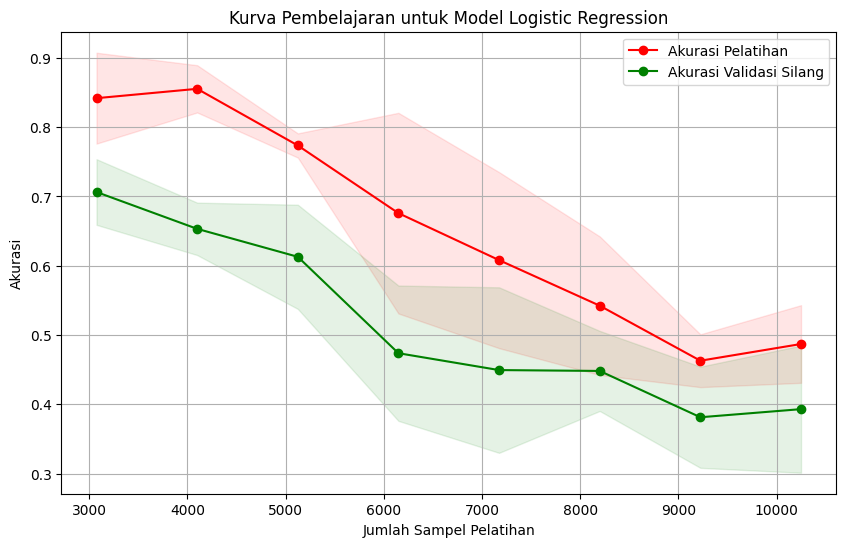

Confusion Matrix (Normalized):
 [[0.99479873 0.00520127]
 [0.         1.        ]]


In [94]:

# Buat model Logistic Regression
model = LogisticRegression(max_iter=500)

# Latih model pada data pelatihan
model.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data pengujian
y_pred = model.predict(X_test)

# Metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Cetak metrik evaluasi
print('Akurasi:', accuracy)
print('Presisi:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', conf_matrix)

# Plot kurva pembelajaran
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Hitung rata-rata dan deviasi standar skor pelatihan dan skor pengujian
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot kurva pembelajaran
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='r', label='Akurasi Pelatihan')
plt.plot(train_sizes, test_mean, 'o-', color='g', label='Akurasi Validasi Silang')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
plt.xlabel('Jumlah Sampel Pelatihan')
plt.ylabel('Akurasi')
plt.title('Kurva Pembelajaran untuk Model Logistic Regression')  # Tambahkan judul
plt.legend()
plt.grid(True)
plt.show()

# Normalisasi Confusion Matrix
conf_matrix_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
print('Confusion Matrix (Normalized):\n', conf_matrix_normalized)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Parameter Terbaik: {'C': 100, 'penalty': 'l2'}
Akurasi (setelah penyetelan): 1.0
Presisi (setelah penyetelan): 1.0
Recall (setelah penyetelan): 1.0
F1 Score (setelah penyetelan): 1.0
Confusion Matrix (setelah penyetelan):
 [[4422    0]
 [   0 1984]]


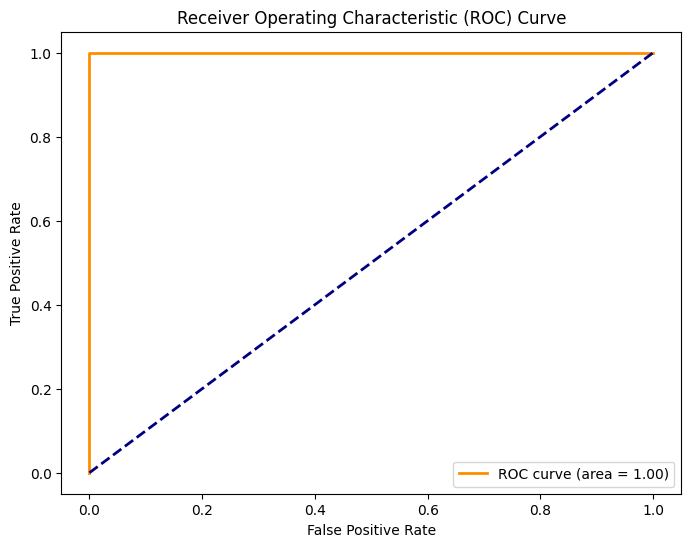

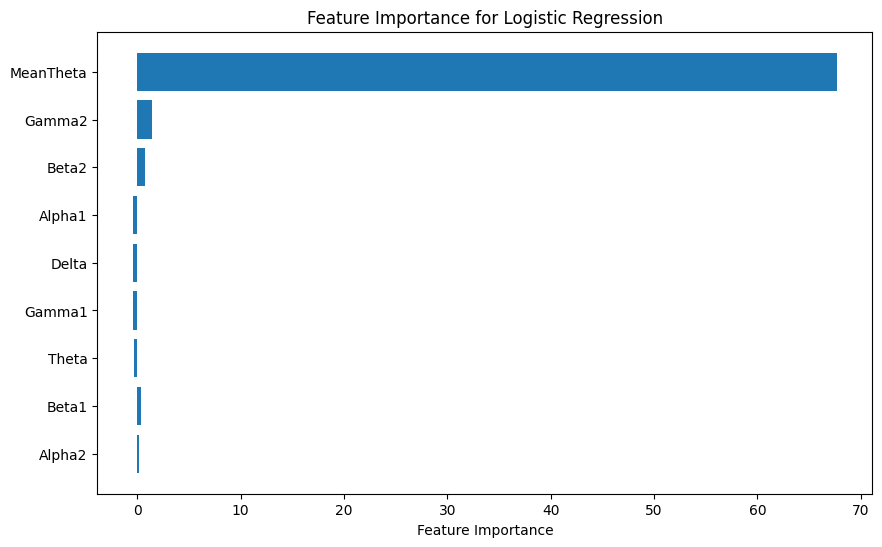

In [95]:

# Evaluasi Hyperparameter dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

# Tentukan ruang hyperparameter yang akan diuji
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Buat model Logistic Regression
model = LogisticRegression(max_iter=500)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Print parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)

# Gunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Buat prediksi pada data pengujian
y_pred = best_model.predict(X_test)

# Metrik evaluasi setelah penyetelan hyperparameter
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Cetak metrik evaluasi setelah penyetelan hyperparameter
print('Akurasi (setelah penyetelan):', accuracy)
print('Presisi (setelah penyetelan):', precision)
print('Recall (setelah penyetelan):', recall)
print('F1 Score (setelah penyetelan):', f1)
print('Confusion Matrix (setelah penyetelan):\n', conf_matrix)

# Kurva ROC dan AUC
from sklearn.metrics import roc_curve, auc

y_scores = best_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot Kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance
if hasattr(best_model, 'coef_'):
    feature_importance = best_model.coef_[0]
    sorted_idx = np.argsort(np.abs(feature_importance))

    # Plot Feature Importance
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
    plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
    plt.xlabel('Feature Importance')
    plt.title('Feature Importance for Logistic Regression')
    plt.show()


In [96]:

# Evaluasi Hyperparameter dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

# Tentukan ruang hyperparameter yang akan diuji
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Buat model Logistic Regression
model = LogisticRegression(max_iter=500)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Print parameter terbaik
print("Parameter Terbaik:", grid_search.best_params_)

# Gunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Buat prediksi pada data pengujian
y_pred = best_model.predict(X_test)

# Metrik evaluasi setelah penyetelan hyperparameter
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Cetak metrik evaluasi setelah penyetelan hyperparameter
print('Akurasi (setelah penyetelan): {:.2%}'.format(accuracy))
print('Presisi (setelah penyetelan): {:.2%}'.format(precision))
print('Recall (setelah penyetelan): {:.2%}'.format(recall))
print('F1 Score (setelah penyetelan): {:.2%}'.format(f1))
print('Confusion Matrix (setelah penyetelan):\n', conf_matrix)


Parameter Terbaik: {'C': 100, 'penalty': 'l2'}
Akurasi (setelah penyetelan): 100.00%
Presisi (setelah penyetelan): 100.00%
Recall (setelah penyetelan): 100.00%
F1 Score (setelah penyetelan): 100.00%
Confusion Matrix (setelah penyetelan):
 [[4422    0]
 [   0 1984]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

In [97]:
import joblib

# Evaluasi Hyperparameter dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

# Tentukan ruang hyperparameter yang akan diuji
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Buat model Logistic Regression
model = LogisticRegression(max_iter=500)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Gunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Menyimpan model ke file
joblib.dump(best_model, 'logistic_regression_model.joblib')


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

['logistic_regression_model.joblib']

# **Validasi out-of-sample**

---


In [98]:
from sklearn.model_selection import train_test_split

# Split data menjadi set pelatihan dan validasi
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# ...

# Evaluasi Hyperparameter dengan GridSearchCV
from sklearn.model_selection import GridSearchCV

# Tentukan ruang hyperparameter yang akan diuji
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Buat model Logistic Regression
model = LogisticRegression(max_iter=500)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Gunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Menyimpan model ke file
joblib.dump(best_model, 'logistic_regression_model.joblib')

# Gunakan model yang disimpan untuk prediksi pada data validasi
loaded_model = joblib.load('logistic_regression_model.joblib')
y_valid_pred = loaded_model.predict(X_valid)

# Metrik evaluasi pada data validasi
accuracy_valid = accuracy_score(y_valid, y_valid_pred)
precision_valid = precision_score(y_valid, y_valid_pred)
recall_valid = recall_score(y_valid, y_valid_pred)
f1_valid = f1_score(y_valid, y_valid_pred)
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)

# Cetak metrik evaluasi pada data validasi
print('Akurasi pada Data Validasi:', accuracy_valid)
print('Presisi pada Data Validasi:', precision_valid)
print('Recall pada Data Validasi:', recall_valid)
print('F1 Score pada Data Validasi:', f1_valid)
print('Confusion Matrix pada Data Validasi:\n', conf_matrix_valid)


Akurasi pada Data Validasi: 0.3074522044479126
Presisi pada Data Validasi: 0.3074522044479126
Recall pada Data Validasi: 1.0
F1 Score pada Data Validasi: 0.4703073709340495
Confusion Matrix pada Data Validasi:
 [[   0 1775]
 [   0  788]]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

# **Validasi Silang (Cross-Validation)**

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Hasil Cross-Validation: [1. 1. 1. 1. 1.]
Rata-rata Akurasi Cross-Validation: 100.00%


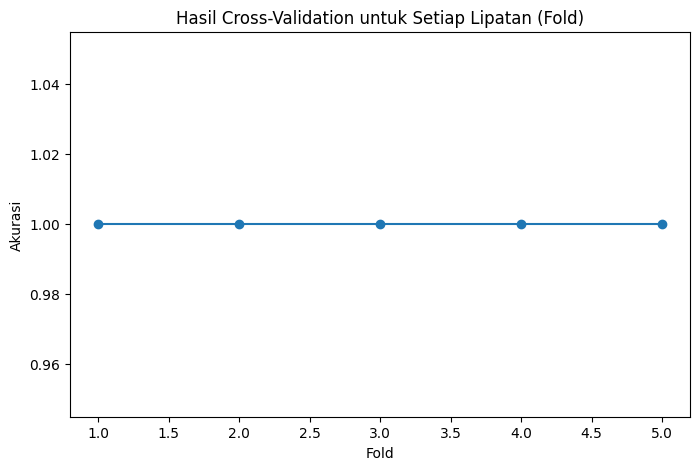

In [99]:
# ...

# Evaluasi Hyperparameter dengan GridSearchCV
from sklearn.model_selection import GridSearchCV, cross_val_score

# Tentukan ruang hyperparameter yang akan diuji
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Buat model Logistic Regression
model = LogisticRegression(max_iter=500)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

# Gunakan model dengan parameter terbaik
best_model = grid_search.best_estimator_

# Menyimpan model ke file
joblib.dump(best_model, 'logistic_regression_model.joblib')

# Evaluasi model dengan cross-validation
cross_val_results = cross_val_score(best_model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')

# Cetak hasil cross-validation
print("Hasil Cross-Validation:", cross_val_results)
print("Rata-rata Akurasi Cross-Validation: {:.2%}".format(np.mean(cross_val_results)))

# Plot hasil cross-validation
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), cross_val_results, marker='o')
plt.title('Hasil Cross-Validation untuk Setiap Lipatan (Fold)')
plt.xlabel('Fold')
plt.ylabel('Akurasi')
plt.show()


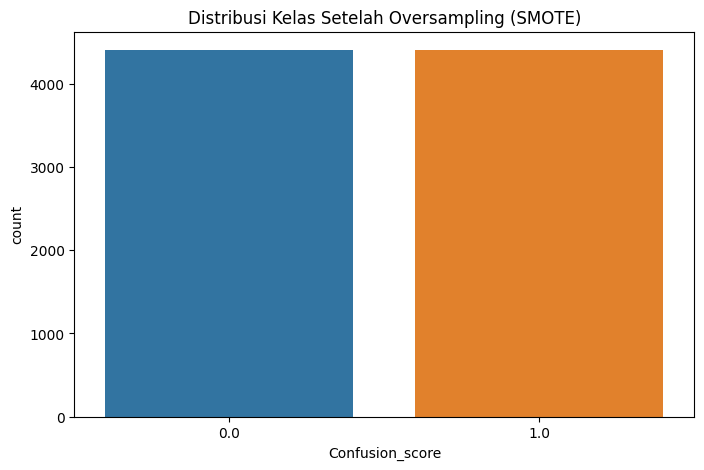

In [106]:
from imblearn.over_sampling import SMOTE
import seaborn as sns

# ...

# Sample data menggunakan SMOTE
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Visualisasi distribusi kelas setelah oversampling
plt.figure(figsize=(8, 5))
sns.countplot(x=y_train_resampled)
plt.title('Distribusi Kelas Setelah Oversampling (SMOTE)')
plt.show()

# ...
